In [ ]:
### Processing mouse CTC scRNA seq data using seurat protocol
### Due to low sample sizes we have not used quality control measures

In [135]:
library(Seurat)
library(pheatmap)
library(RColorBrewer)

In [4]:
download.file("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE51nnn/GSE51372/suppl/GSE51372%5FreadCounts%2Etxt%2Egz", "mouseSCRNA.gz")

In [7]:
data = read.csv("mouseSCRNA.gz", header = T, stringsAsFactors = F, check.names = F, comment.char = "#", row.names = 1, sep = "\t")

In [9]:

###Preprocess the data (adding annotations)

head(data)
names = data[,3]
data = data[, -c(1:5)]

,Entrez GeneID,uniGene,symbol,name,mm9 knownGene ID,GMP1-1-030413,GMP1-2-030413,GMP1-3-030413,GMP1-4-030413,GMP1-5-030413,⋯,WBC-11,WBC-12,WBC-2,WBC-3,WBC-4,WBC-5,WBC-6,WBC-7,WBC-8,WBC-9
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
eg:100009600:chr9:m,100009600,Mm.483362,Zglp1,"Zinc finger, GATA-like protein 1",,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
eg:100009609:chr7:m,100009609,Mm.389926,Vmn2r65,"Vomeronasal 2, receptor 65",,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
eg:100009614:chr10:p,100009614,Mm.35821,Gm10024,Predicted gene 10024,,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
eg:100012:chr4:m,100012,Mm.28722,Oog3,Oogenesin 3,,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
eg:100017:chr4:m,100017,Mm.482148,Ldlrap1,Low density lipoprotein receptor adaptor protein 1,,0,0,0,0,0,⋯,0,0,0,0,0,0,0,205,0,0
eg:100019:chr4:p,100019,Mm.24627,Mdn1,Midasin homolog (yeast),,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0


In [12]:
data = as.matrix(data)
rownames(data) = names

In [25]:
### convert data to seurat object
dat = as.data.frame(data)
pbmc = CreateSeuratObject(dat)

In [26]:
### using standard log normalize for normalization

head(seu)
pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)


,orig.ident,nCount_RNA,nFeature_RNA
,<fct>,<dbl>,<int>
GMP1-1-030413,SeuratProject,103691,705
GMP1-2-030413,SeuratProject,400816,1089
GMP1-3-030413,SeuratProject,983760,981
GMP1-4-030413,SeuratProject,457224,850
GMP1-5-030413,SeuratProject,612172,589
GMP1-6-030413,SeuratProject,332968,694
GMP1-7-030413,SeuratProject,176294,841
GMP2-1-040513,SeuratProject,17873409,8207
GMP2-10-040513,SeuratProject,12464297,5147


In [27]:
## using 2000 highly variable features for PCA
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

Centering and scaling data matrix

PC_ 1 
Positive:  Gm6644, Akr1b3, Dcn, Serping1, A130040M12Rik, C3, Malat1, Csrp2, Hspb1, Ccdc80 
	   Igfbp4, Hsp90b1, Ptgis, Egr1, Igfbp5, Nbl1, Slc9a3r1, Tmem119, Npm1, Upk3b 
	   Mt1, Cryab, Pcolce, Agap1, Tnks1bp1, Cacnb3, Tnip1, Prelp, Syne2, X.4976 
Negative:  Ppbp, Alox12, Itga2b, Pf4, Myl9, Clec1b, Gng11, Vwf, Plek, F5 
	   AU023871, Gp9, Stom, Tubb1, Srgn, Cd9, Tmem40, Ctla2a, Itgb3, Mpl 
	   Pttg1ip, Cnn2, Zyx, Thbs1, Parvb, Rgs10, Tmsb4x, X1810058I24Rik, Cd84, Hist1h1c 
PC_ 2 
Positive:  A130040M12Rik, C3, Plxna4, Serping1, Slpi, Dcn, Myl6, Rarres2, Hspb1, Lrrc61 
	   Igfbp5, Gp5, X1810058I24Rik, Akr1b3, Gm6644, Nipal3, Clu, Gp1bb, Upk3b, Ccdc80 
	   Ptpn18, Ptgis, Tmem119, Dmkn, AU023871, Sh3bgrl3, Mt1, Fcer1g, S100a1, Ctla2a 
Negative:  Klf1, Car2, Hemgn, Cpox, Lmo2, Ermap, Rrm2, Mki67, Cldn13, Rhd 
	   Hmbs, C330027C09Rik, Abcg2, Cdca3, Slc16a6, Epb4.2, Slc4a1, Ubac1, Ube2c, Prdx3 
	   Rhag, Hagh, Gypa, Fam55b, Ank1, Hmmr, Narf, Cmpk2, K

In [42]:
### considering first 40 PCs explaining  83.7% of the variance to perform clustering
sum(pbmc@reductions$pca@stdev[1:40])/sum(pbmc@reductions$pca@stdev)


### find neighbors and clustering
pbmc <- FindNeighbors(pbmc, dims = 1:35)
pbmc <- FindClusters(pbmc, resolution = 0.5)

[1] 0.837057

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 187
Number of edges: 5697

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7367
Number of communities: 4
Elapsed time: 0 seconds


In [48]:

pbmc <- RunUMAP(pbmc, dims = 1:10)

11:56:28 UMAP embedding parameters a = 0.9922 b = 1.112

11:56:28 Read 187 rows and found 10 numeric columns

11:56:28 Using Annoy for neighbor search, n_neighbors = 30

11:56:28 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:56:29 Writing NN index file to temp file /tmp/RtmpKeooGb/file1edd2477a32d

11:56:29 Searching Annoy index using 1 thread, search_k = 3000

11:56:29 Annoy recall = 100%

11:56:29 Commencing smooth kNN distance calibration using 1 thread

11:56:29 Initializing from normalized Laplacian + noise

11:56:29 Commencing optimization for 500 epochs, with 5722 positive edges

11:56:30 Optimization finished



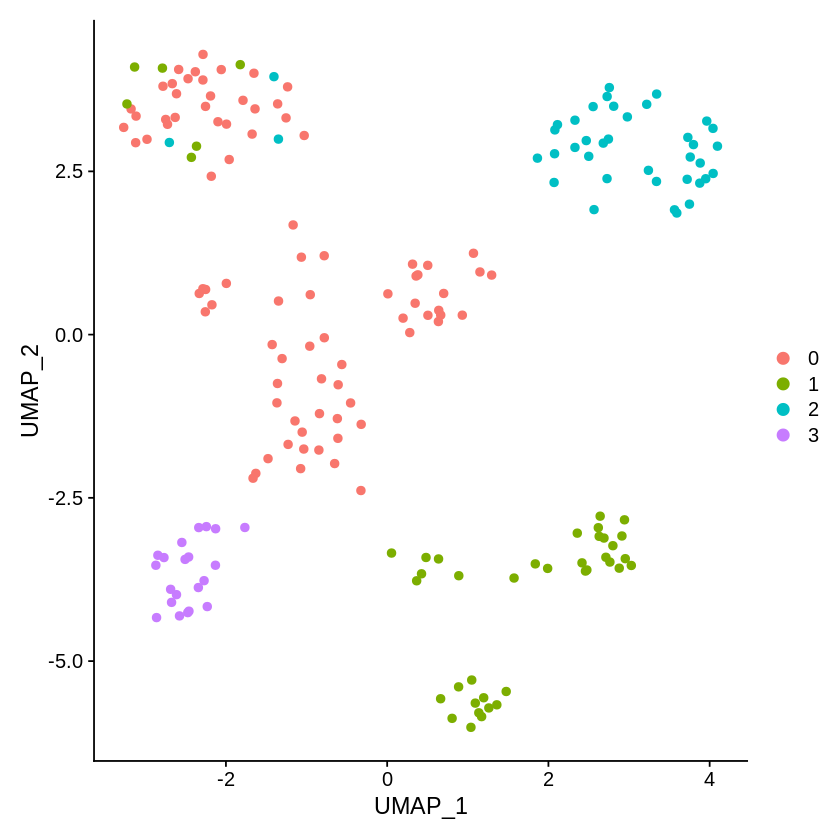

In [47]:
DimPlot(pbmc, reduction = "umap", pt.size = 2)

In [79]:
### retrieve author deposited cell annotations

download.file("ftp.ncbi.nlm.nih.gov/geo/series/GSE51nnn/GSE51372/matrix/GSE51372_series_matrix.txt.gz", "annotations_mouse.gz")

ann = read.csv(gzfile("annotations_mouse.gz"), header = T, stringsAsFactors = F, check.names = F, comment.char = "#", sep = "\t", skip = 47)

In [101]:
sampleinfo  = t(data.frame(ann[7, -1], check.names = F))
colnames(sampleinfo) = "annotations"
seurat_clusters = data.frame(clusters = pbmc$seurat_clusters)
si = cbind(sampleinfo, seurat_clusters)

In [52]:
### labelled circulatory tumor cells contain megakaryocytes and CTCs

pbmc.markers <- FindAllMarkers(pbmc, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3



In [141]:
genes = c("Wt1", "Gp1a", "Gp1b", "Muc6", "Krt19", "Dcn", "Jup", "Muc1", "Gp5", "Gp6", "P2ry12", "Krt7", "Msln", "CDH1")


[1] "Primary"             "single primary"      "single enriched CTC"
[4] "NB508 cell"          "Embryonic cell"      "WBC"                
[7] "single CTC"

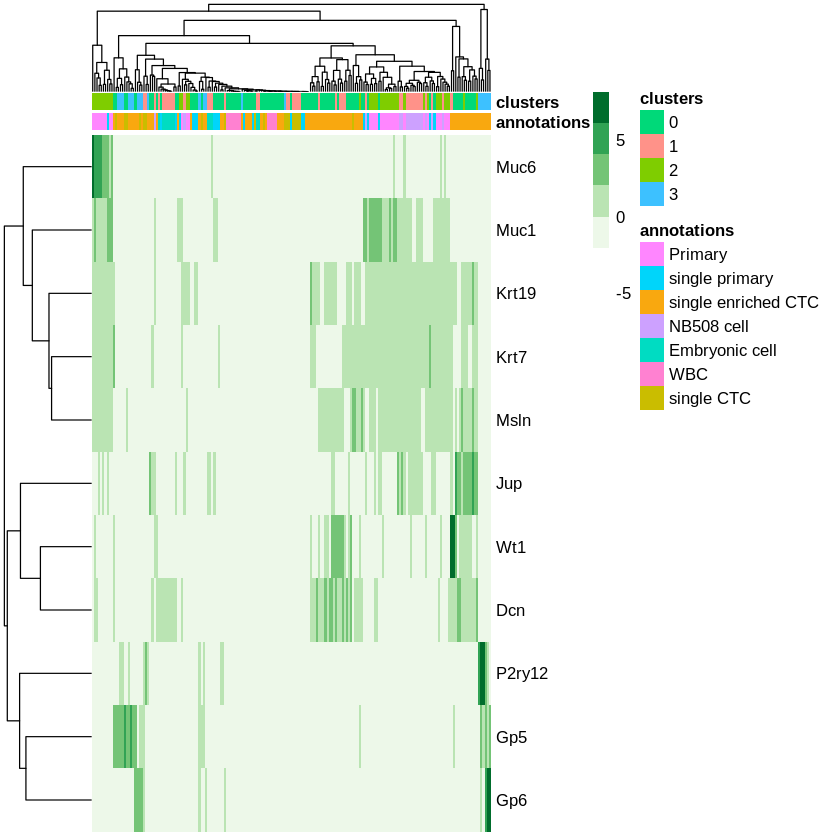

In [142]:
scdata = pbmc@assays$RNA@scale.data
int = intersect(genes, rownames(scdata))
si[,1] = as.factor(si[,1])
levels(si[,1])
levels(si[,1]) =c("Primary", "single primary", "single enriched CTC", "NB508 cell", "Embryonic cell", "WBC", "single CTC")pdf("test.pdf", 20, 8)

### Code for cluster visibility in the heatmap
new_t = scdata
colnames(new_t) = si[colnames(new_t),2]
uni = unique(colnames(new_t))
new_t = new_t[int, ]
lis = c()
for(i in 1:length(uni)){
    id = grep(uni[i], colnames(new_t))
    r = hclust(dist(t(new_t[, id])))
    lis = append(lis, id[r$order])
    }


pheatmap(scdata[int, lis], annotation_col = si, scale = "row", col = c("white", "white", "white","white", brewer.pal(6, "Greens")[1:6]), show_colnames = F, cluster_cols =F)